# 1- Importation et Traitement des Données

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import seaborn as sns

In [2]:
dispo_ali = pd.read_csv('dispo_alimentaire.csv', sep=";")
dispo_ali.rename(columns={'Zone': 'Country'}, inplace = True)
dispo_ali.head(2)


,Country,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Unnamed: 18,Unnamed: 19
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.00,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Agrumes,Autres,vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,NaN


##### Calcul du taux d'autosuffisance alimentaire
##### taux d/autosuffissance ali= nourriture/(la production+ importations -exportations)

In [3]:
#taux d/autosuffissance ali= nourriture/(la production+ importations -exportations)
dispo_ali['% d/autosuffissance ali']= dispo_ali['Nourriture']/(dispo_ali['Production'] + dispo_ali['Importations - Quantité'] - dispo_ali['Exportations - Quantité'])* 100
dispo_ali.head(2)

,Country,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Unnamed: 18,Unnamed: 19,% d/autosuffissance ali
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.00,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Agrumes,Autres,vegetale,NaN,NaN,1.00,1.29,0.01,0.02,...,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,NaN,-108.108108


##### Calcul du taux de dépendance alimentaire
##### taux de dépendance ali = importations/(la production+ importations -exportations)

In [4]:
#taux de dépendance ali = importations/(la production+ importations -exportations)

dispo_ali['% dépendance ali'] = dispo_ali['Importations - Quantité']/(dispo_ali['Production'] + dispo_ali['Importations - Quantité'] - dispo_ali['Exportations - Quantité'])* 100
dispo_ali.head(2)

,Country,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Unnamed: 18,Unnamed: 19,% d/autosuffissance ali,% dépendance ali
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.00,...,53.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Agrumes,Autres,vegetale,NaN,NaN,1.00,1.29,0.01,0.02,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,NaN,-108.108108,-5.405405


In [5]:
PoliticalStability = pd.read_csv('PoliticalStability(Récupération automatique).csv')
PoliticalStability.head(2)

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total


In [6]:
PoliticalStability.drop(columns = 'Granularity', inplace = True)
PoliticalStability['Country'] = PoliticalStability['Country'].map({'Afghanistan': 'Afghanistan', 'Albania': 'Albanie', 'Algeria':'Algérie',  
       'Angola':'Angola', 'Antigua and Barbuda':'Antigua-et-Barbuda', 'Argentina':'Argentine' , 'Armenia':'Arménie',
       'Australia':'Australie', 'Austria':'Autriche', 'Azerbaijan':'Azerbaïdjan', 'Bahamas':'Bahamas', 
       'Bangladesh': 'Bangladesh', 'Barbados':'Barbade', 'Belarus':'Bélarus', 'Belgium': 'Belgique', 'Belize':'Belize', 'Benin':'Bénin',
       'Bermuda':'Bermudes',  'Bolivia (Plurinational State of)':'Bolivie (État plurinational de)',
       'Bosnia and Herzegovina': 'Bosnie-Herzégovine', 'Botswana': 'Botswana', 'Brazil':'Brésil',
       'Brunei Darussalam':'Brunéi Darussalam', 'Bulgaria':'Bulgarie', 'Burkina Faso':'Burkina Faso', 
       'Cabo Verde':'Cabo Verde', 'Cambodia':'Cambodge', 'Cameroon':'Cameroun', 'Canada':'Canada',
       'Central African Republic': 'République centrafricaine', 'Chad':'Tchad', 'Chile':'Chili', 'China':'Chine', 'Colombia':'Colombie',
     'Congo':'Congo', 'Costa Rica':'Costa Rica', "Côte d'Ivoire":"Côte d'Ivoire",
       'Croatia':'Croatie', 'Cuba':'Cuba', 'Cyprus':'Chypre', 'Czechia':'Tchéquie (la)',
       "Democratic People's Republic of Korea": 'République populaire démocratique de Corée',
        'Denmark':'Danemark', 'Djibouti': 'Djibouti',
       'Dominica':'Dominique', 'Dominican Republic':'République dominicaine', 'Ecuador':'Équateur', 'Egypt': 'Égypte',
       'El Salvador':'El Salvador', 'Estonia':'Estonie',
       'Eswatini': 'Eswatini', 'Ethiopia':'Éthiopie', 'Fiji':'Fidji', 'Finland':'Finlande', 'France':'France', 'Gabon':'Gabon',
       'Gambia':'Gambie', 'Georgia':'Géorgie', 'Germany':'Allemagne', 'Ghana': 'Ghana', 'Greece':'Grèce',
       'Grenada':'Grenade' , 'Guatemala':'Guatemala', 'Guinea': 'Guinée', 'Guinea-Bissau': 'Guinée-Bissau', 'Guyana':'Guyana',
       'Haiti':'Haïti', 'Honduras': 'Honduras', 'Hungary':'Hongrie', 'Iceland':'Islande', 'India':'Inde', 'Indonesia':'Indonésie',
       'Iran (Islamic Republic of)': "Iran (République islamique d')", 'Iraq':'Iraq', 'Ireland':'Irlande', 'Israel': 'Israël', 'Italy':'Italie',
       'Jamaica':'Jamaïque', 'Japan':'Japon', 'Jordan':'Jordanie', 'Kazakhstan':'Kazakhstan', 'Kenya': 'Kenya', 'Kiribati':'Kiribati',
       'Kuwait':'Koweït', 'Kyrgyzstan':'Kirghizistan', "Lao People's Democratic Republic": 'République démocratique populaire lao',
       'Latvia':'Lettonie', 'Lebanon':'Liban', 'Lesotho':'Lesotho', 'Liberia':'Libéria',  'Lithuania': 'Lituanie',
       'Luxembourg':'Luxembourg', 'Madagascar': 'Madagascar', 'Malawi':'Malawi', 'Malaysia':'Malaisie', 'Maldives': 'Maldives',
       'Mali':'Mali', 'Malta':'Malte',  'Mauritania':'Mauritanie', 'Mauritius':'Maurice',
       'Mexico':'Mexique',  'Mongolia':'Mongolie',
       'Montenegro':'Monténégro', 'Morocco':'Maroc', 'Mozambique':'Mozambique', 'Myanmar':'Myanmar', 'Namibia':'Namibie',
       'Nepal': 'Népal', 'Netherlands': 'Pays-Bas', 'New Zealand':'Nouvelle-Zélande', 'Nicaragua':'Nicaragua',
       'Niger':'Niger', 'Nigeria':'Nigéria',  'North Macedonia':'Macédoine du Nord', 'Norway':'Norvège', 'Oman':'Oman',
       'Pakistan':'Pakistan',   'Panama':'Panama', 
       'Paraguay':'Paraguay', 'Peru':'Pérou', 'Philippines':'Philippines', 'Poland':'Pologne', 'Portugal': 'Portugal',
       'Republic of Korea':'République de Corée', 'Republic of Moldova': 'République de Moldova',
       'Romania':'Roumanie', 'Russian Federation':'Fédération de Russie', 'Rwanda':'Rwanda', 'Saint Kitts and Nevis':'Saint-Kitts-et-Nevis',
       'Saint Lucia':'Sainte-Lucie', 'Saint Vincent and the Grenadines': 'Saint-Vincent-et-les Grenadines', 'Samoa':'Samoa',
       'Sao Tome and Principe':'Sao Tomé-et-Principe', 'Saudi Arabia':'Arabie saoudite', 'Senegal':'Sénégal', 'Serbia':'Serbie',
       'Sierra Leone':'Sierra Leone',  'Slovakia':'Slovaquie', 'Slovenia': 'Slovénie',
       'Solomon Islands':'Îles Salomon',  'South Africa':'Afrique du Sud', 
       'Spain':'Espagne', 'Sri Lanka':'Sri Lanka', 'Sudan': 'Soudan', 'Suriname':'Suriname', 'Sweden': 'Suède', 'Switzerland': 'Suisse',
        'Tajikistan': 'Tadjikistan', 'Thailand':'Thaïlande', 'Timor-Leste': 'Timor-Leste',
       'Togo': 'Togo' , 'Trinidad and Tobago':'Trinité-et-Tobago', 'Tunisia':'Tunisie', 'Turkey':'Turquie',
       'Turkmenistan': 'Turkménistan', 'Uganda':'Ouganda', 'Ukraine':'Ukraine',
       'United Arab Emirates':'Émirats arabes unis',
       'United Kingdom of Great Britain and Northern Ireland':'Royaume-Uni',
       'United Republic of Tanzania':'République-Unie de Tanzanie', 'United States of America': "États-Unis d'Amérique",
       'Uruguay':'Uruguay', 'Uzbekistan':'Ouzbékistan', 'Vanuatu':'Vanuatu',
       'Venezuela (Bolivarian Republic of)': 'Venezuela (République bolivarienne du)', 'Viet Nam':'Viet Nam', 'Yemen':'Yémen',
       'Zambia': 'Zambie', 'Zimbabwe':'Zimbabwe'})


##### Filtre sur l'année 2017 de stabilité politique

In [7]:
PoliticalStability = PoliticalStability[PoliticalStability['Year'] == 2017]
PoliticalStability.head(2)

,Country,Year,Political_Stability
16,Afghanistan,2017,-2.80
34,Albanie,2017,0.38


##### Calcul du taux de croissance  de la population 

In [8]:
population = pd.read_csv('Population.csv FILE.csv')
population.head(2)

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779.953
1,Afghanistan,Male,2000,10689.508


In [9]:
population_filtré = population[(population['Year']== 2000) | (population['Year']== 2017) ]
population_filtré = population[population['Granularity']== 'Total']
population_min = population_filtré.groupby(by=["Country"]).min() 

population_max = population_filtré.groupby(by=["Country"]).max() 

population_join = population_min.merge(population_max, how='inner', on='Country')
population_join
population_join["%_croissance_pop"]= (population_join["Population_y"] - population_join["Population_x"]) / population_join["Population_y"] * 100
population_avec_tx = population_join.drop(columns = ["Granularity_x" , "Year_x", "Year_y" , "Granularity_y", "Year_x", 'Population_x','Population_y'])

population_avec_tx.head(2)
#population_join
#population_join

,%_croissance_pop
Country,
Hong Kong SAR,10.382949
Macao SAR,32.273968


##### Calcul du taux d'urbanisation

In [10]:
population_urban = population[(population['Granularity'] == 'Urban') & ( population ['Year'] == 2017)]
population_urban
population_totale = population[(population['Granularity'] == 'Total') & ( population ['Year'] == 2017)]
population_totale 
population_urban_totale = population_urban.merge(population_totale , on = 'Country', how = 'inner')
population_urban_totale
population_urban_totale["%_d'urbanisation"] = population_urban_totale['Population_x']/population_urban_totale['Population_y']*100
population_urban_totale = population_urban_totale.drop(columns = ['Granularity_x', 'Year_x', 'Population_x', 'Granularity_y', 'Year_y','Population_y' ])
population_urban_totale.head(2)

,Country,%_d'urbanisation
0,Afghanistan,24.717446
1,Albania,60.330445


In [11]:
population_2017 = population[(population['Year']== 2017) & (population['Granularity']== 'Total')]
population_2017_= population_2017.merge(population_avec_tx, on = 'Country', how ='left')
population_2017_= population_2017_.merge(population_urban_totale, on = 'Country', how= 'left')
population_2017_.head(2)

,Country,Granularity,Year,Population,%_croissance_pop,%_d'urbanisation
0,Afghanistan,Total,2017,36296.113,44.097716,24.717446
1,Albania,Total,2017,2884.169,7.890970,60.330445


In [12]:
population_2017_['Country'] = population_2017_['Country'].map({'Afghanistan': 'Afghanistan', 'Albania': 'Albanie', 'Algeria':'Algérie',  
       'Angola':'Angola', 'Antigua and Barbuda':'Antigua-et-Barbuda', 'Argentina':'Argentine' , 'Armenia':'Arménie',
       'Australia':'Australie', 'Austria':'Autriche', 'Azerbaijan':'Azerbaïdjan', 'Bahamas':'Bahamas', 
       'Bangladesh': 'Bangladesh', 'Barbados':'Barbade', 'Belarus':'Bélarus', 'Belgium': 'Belgique', 'Belize':'Belize', 'Benin':'Bénin',
       'Bermuda':'Bermudes',  'Bolivia (Plurinational State of)':'Bolivie (État plurinational de)',
       'Bosnia and Herzegovina': 'Bosnie-Herzégovine', 'Botswana': 'Botswana', 'Brazil':'Brésil',
       'Brunei Darussalam':'Brunéi Darussalam', 'Bulgaria':'Bulgarie', 'Burkina Faso':'Burkina Faso', 
       'Cabo Verde':'Cabo Verde', 'Cambodia':'Cambodge', 'Cameroon':'Cameroun', 'Canada':'Canada',
       'Central African Republic': 'République centrafricaine', 'Chad':'Tchad', 'Chile':'Chili', 'China':'Chine', 'Colombia':'Colombie',
     'Congo':'Congo', 'Costa Rica':'Costa Rica', "Côte d'Ivoire":"Côte d'Ivoire",
       'Croatia':'Croatie', 'Cuba':'Cuba', 'Cyprus':'Chypre', 'Czechia':'Tchéquie (la)',
       "Democratic People's Republic of Korea": 'République populaire démocratique de Corée',
        'Denmark':'Danemark', 'Djibouti': 'Djibouti',
       'Dominica':'Dominique', 'Dominican Republic':'République dominicaine', 'Ecuador':'Équateur', 'Egypt': 'Égypte',
       'El Salvador':'El Salvador', 'Estonia':'Estonie',
       'Eswatini': 'Eswatini', 'Ethiopia':'Éthiopie', 'Fiji':'Fidji', 'Finland':'Finlande', 'France':'France', 'Gabon':'Gabon',
       'Gambia':'Gambie', 'Georgia':'Géorgie', 'Germany':'Allemagne', 'Ghana': 'Ghana', 'Greece':'Grèce',
       'Grenada':'Grenade' , 'Guatemala':'Guatemala', 'Guinea': 'Guinée', 'Guinea-Bissau': 'Guinée-Bissau', 'Guyana':'Guyana',
       'Haiti':'Haïti', 'Honduras': 'Honduras', 'Hungary':'Hongrie', 'Iceland':'Islande', 'India':'Inde', 'Indonesia':'Indonésie',
       'Iran (Islamic Republic of)': "Iran (République islamique d')", 'Iraq':'Iraq', 'Ireland':'Irlande', 'Israel': 'Israël', 'Italy':'Italie',
       'Jamaica':'Jamaïque', 'Japan':'Japon', 'Jordan':'Jordanie', 'Kazakhstan':'Kazakhstan', 'Kenya': 'Kenya', 'Kiribati':'Kiribati',
       'Kuwait':'Koweït', 'Kyrgyzstan':'Kirghizistan', "Lao People's Democratic Republic": 'République démocratique populaire lao',
       'Latvia':'Lettonie', 'Lebanon':'Liban', 'Lesotho':'Lesotho', 'Liberia':'Libéria',  'Lithuania': 'Lituanie',
       'Luxembourg':'Luxembourg', 'Madagascar': 'Madagascar', 'Malawi':'Malawi', 'Malaysia':'Malaisie', 'Maldives': 'Maldives',
       'Mali':'Mali', 'Malta':'Malte',  'Mauritania':'Mauritanie', 'Mauritius':'Maurice',
       'Mexico':'Mexique',  'Mongolia':'Mongolie',
       'Montenegro':'Monténégro', 'Morocco':'Maroc', 'Mozambique':'Mozambique', 'Myanmar':'Myanmar', 'Namibia':'Namibie',
       'Nepal': 'Népal', 'Netherlands': 'Pays-Bas', 'New Zealand':'Nouvelle-Zélande', 'Nicaragua':'Nicaragua',
       'Niger':'Niger', 'Nigeria':'Nigéria',  'North Macedonia':'Macédoine du Nord', 'Norway':'Norvège', 'Oman':'Oman',
       'Pakistan':'Pakistan',   'Panama':'Panama', 
       'Paraguay':'Paraguay', 'Peru':'Pérou', 'Philippines':'Philippines', 'Poland':'Pologne', 'Portugal': 'Portugal',
       'Republic of Korea':'République de Corée', 'Republic of Moldova': 'République de Moldova',
       'Romania':'Roumanie', 'Russian Federation':'Fédération de Russie', 'Rwanda':'Rwanda', 'Saint Kitts and Nevis':'Saint-Kitts-et-Nevis',
       'Saint Lucia':'Sainte-Lucie', 'Saint Vincent and the Grenadines': 'Saint-Vincent-et-les Grenadines', 'Samoa':'Samoa',
       'Sao Tome and Principe':'Sao Tomé-et-Principe', 'Saudi Arabia':'Arabie saoudite', 'Senegal':'Sénégal', 'Serbia':'Serbie',
       'Sierra Leone':'Sierra Leone',  'Slovakia':'Slovaquie', 'Slovenia': 'Slovénie',
       'Solomon Islands':'Îles Salomon',  'South Africa':'Afrique du Sud', 
       'Spain':'Espagne', 'Sri Lanka':'Sri Lanka', 'Sudan': 'Soudan', 'Suriname':'Suriname', 'Sweden': 'Suède', 'Switzerland': 'Suisse',
        'Tajikistan': 'Tadjikistan', 'Thailand':'Thaïlande', 'Timor-Leste': 'Timor-Leste',
       'Togo': 'Togo' , 'Trinidad and Tobago':'Trinité-et-Tobago', 'Tunisia':'Tunisie', 'Turkey':'Turquie',
       'Turkmenistan': 'Turkménistan', 'Uganda':'Ouganda', 'Ukraine':'Ukraine',
       'United Arab Emirates':'Émirats arabes unis',
       'United Kingdom of Great Britain and Northern Ireland':'Royaume-Uni',
       'United Republic of Tanzania':'République-Unie de Tanzanie', 'United States of America': "États-Unis d'Amérique",
       'Uruguay':'Uruguay', 'Uzbekistan':'Ouzbékistan', 'Vanuatu':'Vanuatu',
       'Venezuela (Bolivarian Republic of)': 'Venezuela (République bolivarienne du)', 'Viet Nam':'Viet Nam', 'Yemen':'Yémen',
       'Zambia': 'Zambie', 'Zimbabwe':'Zimbabwe'})


##### jointure entre les table stabilité politique, population et dispo alimentaire
##### filtre sur la viande de volaillles


In [13]:
popu_stabilité_pol= population_2017_.merge(PoliticalStability, on = 'Country')  
popu_stabilité_pol.head(2)

,Country,Granularity,Year_x,Population,%_croissance_pop,%_d'urbanisation,Year_y,Political_Stability
0,Afghanistan,Total,2017,36296.113,44.097716,24.717446,2017,-2.80
1,Albanie,Total,2017,2884.169,7.890970,60.330445,2017,0.38


In [14]:
dispo_ali_popu = dispo_ali.merge(popu_stabilité_pol , on = 'Country', how = 'left')
dispo_ali_popu = dispo_ali_popu[dispo_ali_popu['Origine']== 'animale']
dispo_ali_popu = dispo_ali_popu[dispo_ali_popu['Produit']== 'Viande de Volailles']
dispo_ali_popu.head(2)

,Country,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Unnamed: 19,% d/autosuffissance ali,% dépendance ali,Granularity,Year_x,Population,%_croissance_pop,%_d'urbanisation,Year_y,Political_Stability
56,Afghanistan,Viande de Volailles,animale,NaN,NaN,9.0,2.45,0.53,0.87,75.0,...,NaN,NaN,NaN,Total,2017.0,36296.113,44.097716,24.717446,2017.0,-2.80
151,Afrique du Sud,Viande de Volailles,animale,NaN,NaN,151.0,37.57,9.73,14.85,1983.0,...,NaN,100.100959,17.970722,Total,2017.0,57009.756,22.191125,65.511864,2017.0,-0.28


##### Suppression de colonne inutile dans notre analyse

In [15]:
dispo_ali_popu.drop(columns=['Pertes', 'Aliments pour animaux','Semences', 'Unnamed: 18', 'Unnamed: 19', 'Origine', 'Aliments pour animaux', 'Autres Utilisations', 'Granularity', 'Year_y', 'Year_x'], inplace  = True)


In [16]:
dispo_ali_popu.head(2)

,Country,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Traitement,Variation de stock,% d/autosuffissance ali,% dépendance ali,Population,%_croissance_pop,%_d'urbanisation,Political_Stability
56,Afghanistan,Viande de Volailles,9.0,2.45,0.53,0.87,75.0,NaN,48.0,75.0,26.0,NaN,NaN,NaN,NaN,36296.113,44.097716,24.717446,-2.80
151,Afrique du Sud,Viande de Volailles,151.0,37.57,9.73,14.85,1983.0,54.0,356.0,1983.0,1679.0,NaN,2.0,100.100959,17.970722,57009.756,22.191125,65.511864,-0.28


##### Remplacer les nulls par zéro

In [17]:
dispo_ali_popu = dispo_ali_popu.fillna(0)
dispo_ali_popu.head(2)

,Country,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Traitement,Variation de stock,% d/autosuffissance ali,% dépendance ali,Population,%_croissance_pop,%_d'urbanisation,Political_Stability
56,Afghanistan,Viande de Volailles,9.0,2.45,0.53,0.87,75.0,0.0,48.0,75.0,26.0,0.0,0.0,0.000000,0.000000,36296.113,44.097716,24.717446,-2.80
151,Afrique du Sud,Viande de Volailles,151.0,37.57,9.73,14.85,1983.0,54.0,356.0,1983.0,1679.0,0.0,2.0,100.100959,17.970722,57009.756,22.191125,65.511864,-0.28


# 2-ACP

## Matrice de corrélation entre variables

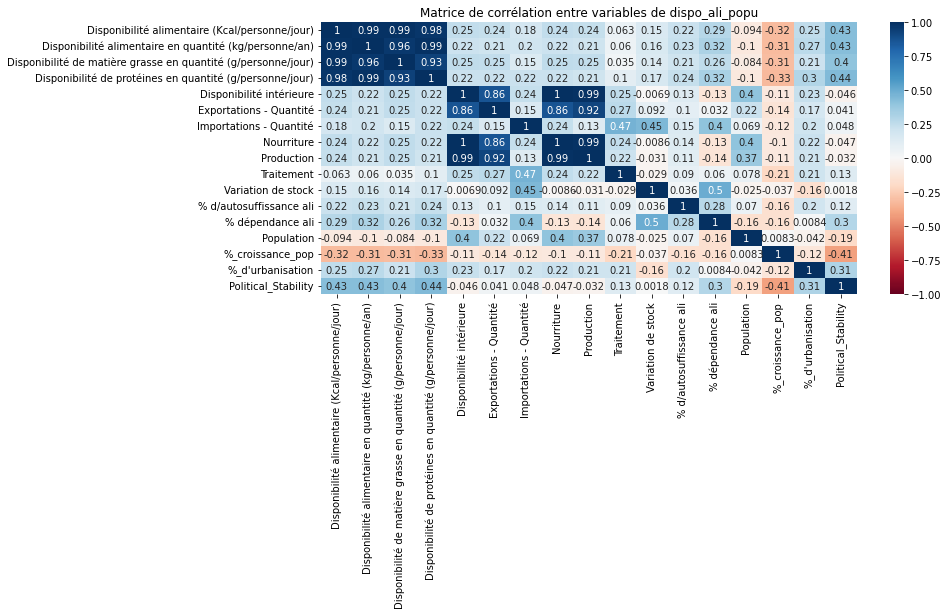

In [18]:
import seaborn as sns
# Matrice de corrélation entre variables
z = dispo_ali_popu.corr()

fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(z, 
            center=0, cmap="RdBu",
            vmin = -1, vmax = 1,
            annot=True)
ax.set_title("Matrice de corrélation entre variables de dispo_ali_popu")
plt.show()

##### synthétiser les variables qui sont trés corrélées entre elles

In [19]:
dispo_ali_popu.drop(columns = ['Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Produit','Variation de stock'], inplace = True )


In [20]:
dispo_ali_popu.set_index("Country",inplace = True)

dispo_ali_popu.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo alimentaire', 'Exportations - Quantité': 'Exportations', 'Importations - Quantité': 'Importations',}, inplace = True)

In [21]:
dispo_ali_popu.head(2)

,Dispo alimentaire,Exportations,Importations,Nourriture,Production,Traitement,% d/autosuffissance ali,% dépendance ali,Population,%_croissance_pop,%_d'urbanisation,Political_Stability
Country,,,,,,,,,,,,
Afghanistan,9.0,0.0,48.0,75.0,26.0,0.0,0.000000,0.000000,36296.113,44.097716,24.717446,-2.80
Afrique du Sud,151.0,54.0,356.0,1983.0,1679.0,0.0,100.100959,17.970722,57009.756,22.191125,65.511864,-0.28


In [22]:
dispo_simple = dispo_ali_popu.drop(columns = ['Exportations', 'Importations','Nourriture','Production',])
dispo_simple = dispo_simple.drop(columns = ['Traitement', 'Population'])
dispo_simple

,Dispo alimentaire,% d/autosuffissance ali,% dépendance ali,%_croissance_pop,%_d'urbanisation,Political_Stability
Country,,,,,,
Afghanistan,9.0,0.000000,0.000000,44.097716,24.717446,-2.80
Afrique du Sud,151.0,100.100959,17.970722,22.191125,65.511864,-0.28
Albanie,67.0,100.000000,59.523810,7.890970,60.330445,0.38
Algérie,26.0,100.000000,1.030928,26.489687,71.928469,-0.92
Allemagne,65.0,93.626514,50.223072,2.763828,76.752172,0.59
...,...,...,...,...,...,...
Émirats arabes unis,138.0,102.400000,100.000000,67.458464,85.456546,0.62
Équateur,94.0,100.291545,0.291545,25.773488,63.061182,-0.07
États-Unis d'Amérique,197.0,99.416149,0.627329,13.875229,81.899723,0.34


##### choix du nombre de composantes à calculer

In [23]:
n_comp = 6
data_pca = dispo_simple

In [24]:
X = data_pca.values
names = data_pca.index  
features = data_pca.columns

##### Centrage et Réduction

In [25]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-1.06150399, -2.22159583, -0.76119414,  1.60882161, -1.39707002,
        -3.08385264],
       [ 1.23406653,  0.53685043, -0.32014138,  0.05896345,  0.34700372,
        -0.23891588],
       [-0.12387659,  0.53406834,  0.69968988, -0.95275093,  0.12548378,
         0.50618661],
       ...,
       [ 1.97770205,  0.51797937, -0.74579769, -0.52937363,  1.04762982,
         0.46102888],
       [-1.17466592,  0.53406834, -0.76119414,  1.27421062, -1.59727228,
        -1.8194363 ],
       [-1.02917201, -2.22159583, -0.76119414,  1.09193   , -1.49690498,
         0.30297684]])

##### Calcul des composantes principales

In [26]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

### Determiner le nombre de composante à retenir

##### Eboulis des valeurs propres

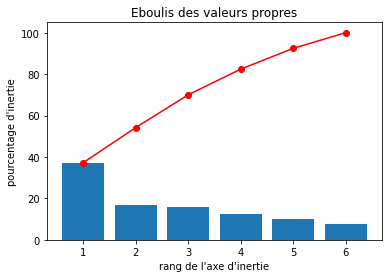

In [27]:
display_scree_plot(pca)

##### Mis en pourcentage des valeurs propres

In [28]:
n = data_pca.shape[0]           # nombre d'observations
p = data_pca.shape[1]           # nombre de variables
# Valeur corrigé : variance expliqué 
eigval = (n-1)/n*pca.explained_variance_


In [29]:
explained_pourcentage = pca.explained_variance_ratio_*100
explained_pourcentage_cumsum = pca.explained_variance_ratio_.cumsum()*100

In [30]:
print(pd.DataFrame({'Valeurs propres':eigval.round(3), '(%) explained':explained_pourcentage.round(2), '(%) cumulated' : explained_pourcentage_cumsum.round(2)}))

   Valeurs propres  (%) explained  (%) cumulated
0            2.237          37.28          37.28
1            1.015          16.92          54.20
2            0.950          15.84          70.04
3            0.742          12.37          82.41
4            0.603          10.04          92.46
5            0.453           7.54         100.00


La première composante prend 37.28% de l’information disponible, la deuxième 16.92 %, et la troisieme prend  15.84 %.
Au total, ces trois composantes expliquent  70.04% de la variance totale, en utilisant 
un demi des dimensions initiales. 
Je peux représenter chaque pays/variable selon ces trois dimensions uniquement.
Nous choisissons c_comp = 3.

### Contribution des variables aux axes

In [31]:
pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, 7)] , index=data_pca.columns[:13])

,PC1,PC2,PC3,PC4,PC5,PC6
Dispo alimentaire,-0.487470,-0.046251,0.079386,0.217845,0.837950,0.065693
% d/autosuffissance ali,-0.325635,0.443201,-0.603925,-0.476896,0.041463,-0.321962
% dépendance ali,-0.361020,0.654716,0.117850,0.419419,-0.324061,0.382354
%_croissance_pop,0.413603,0.161592,-0.429307,0.676599,0.143646,-0.374294
%_d'urbanisation,-0.319673,-0.539147,-0.602784,0.203098,-0.241205,0.379937
Political_Stability,-0.502734,-0.236619,0.259673,0.223978,-0.335099,-0.679252


### Interprétation des axes principaux
#### axe 1 la taille du marché/marché matûre
#### axe 2 pays dépendant (en haut)
#### axe 3 de l'autosuffisance (en négatif)


##### Cercle des corrélations

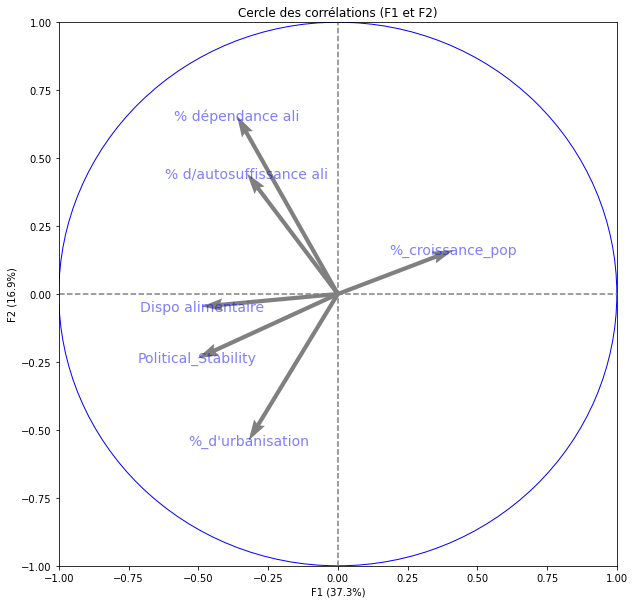

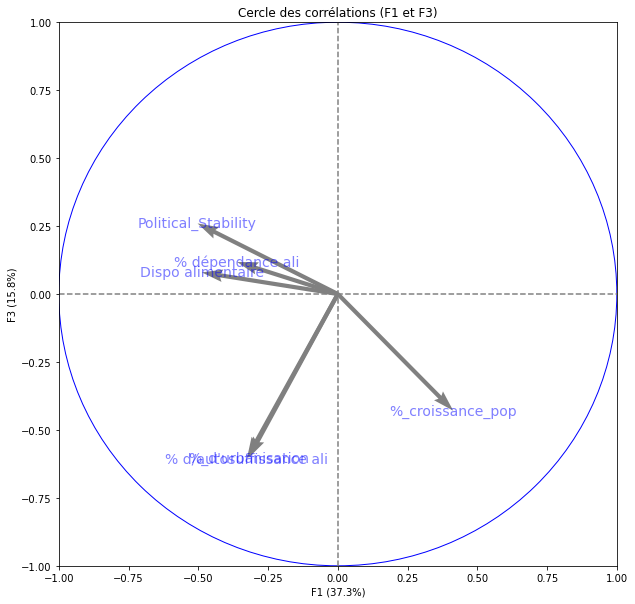

In [32]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2)], labels = np.array(features))

##### Projection des individus

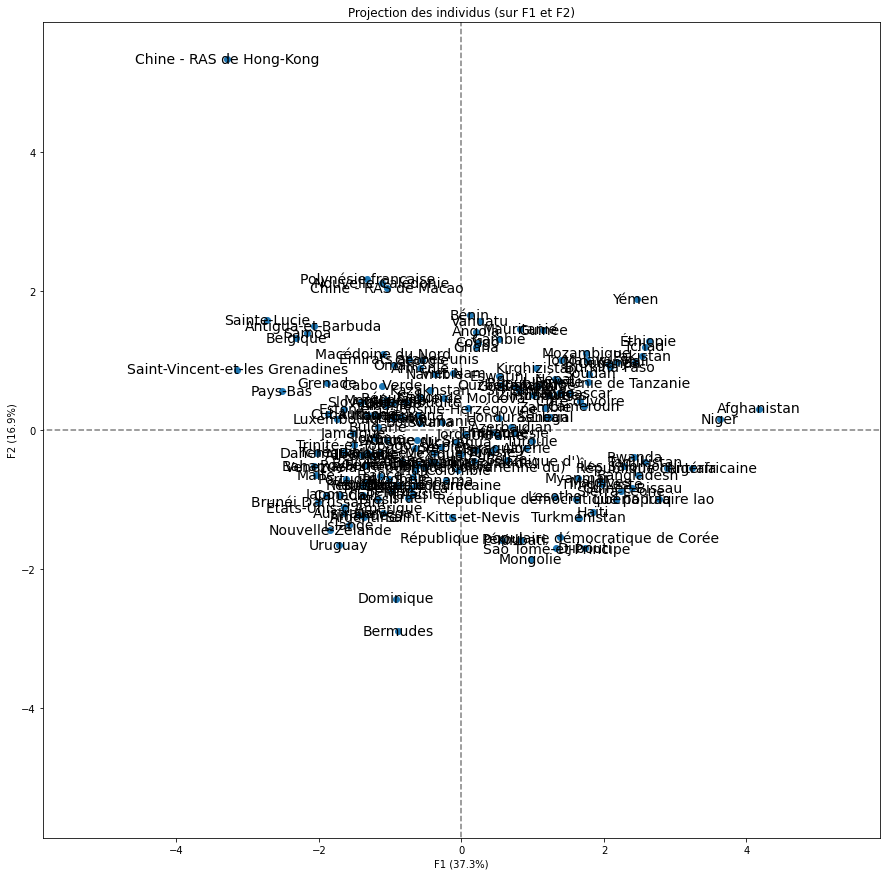

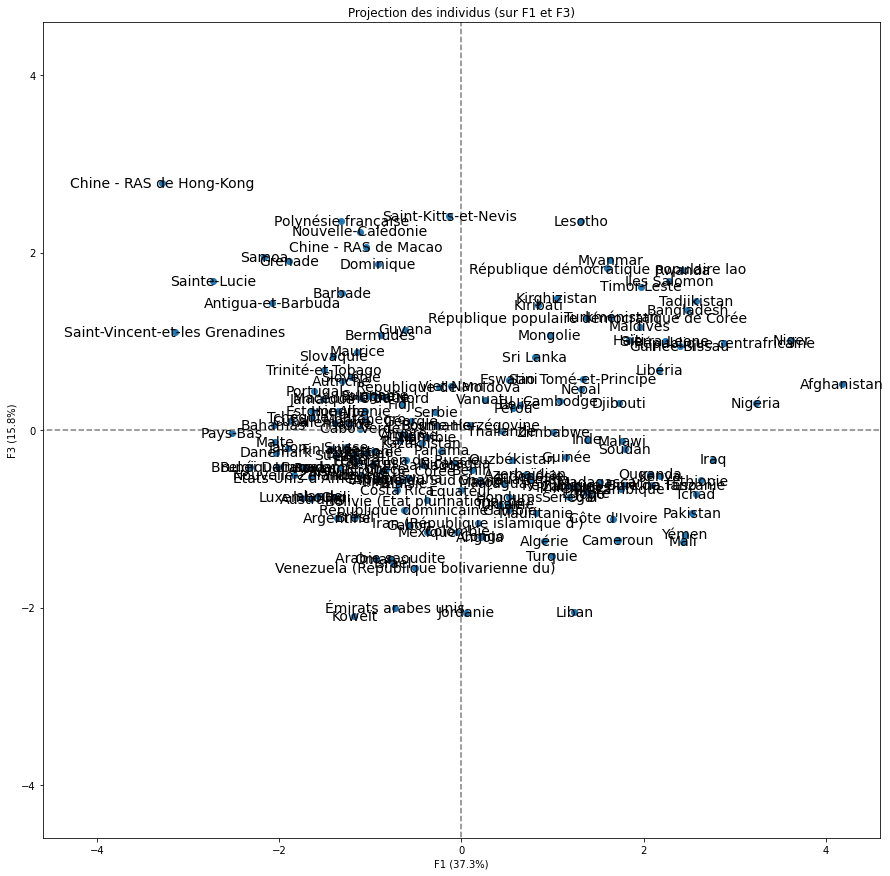

In [33]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2)],  labels = np.array(names))

plt.show()

##### Interprétation de quelques individus sur les axes 1 et 2
Chine- RAS de Hong Kong est un pays stable et consommateur de poulet mais c'est un petit marché,
L\Afghanistant quant à lui est un pays instable et peu consommateur, 
Les Bermudes sont peu urbanisé avec une consommation moyenne en poulet

# 3-la classification ascendante  hiérarchique

### Clustering hiérarchique

In [34]:
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_scaled, 'ward')

### Affichage du dendrogramme

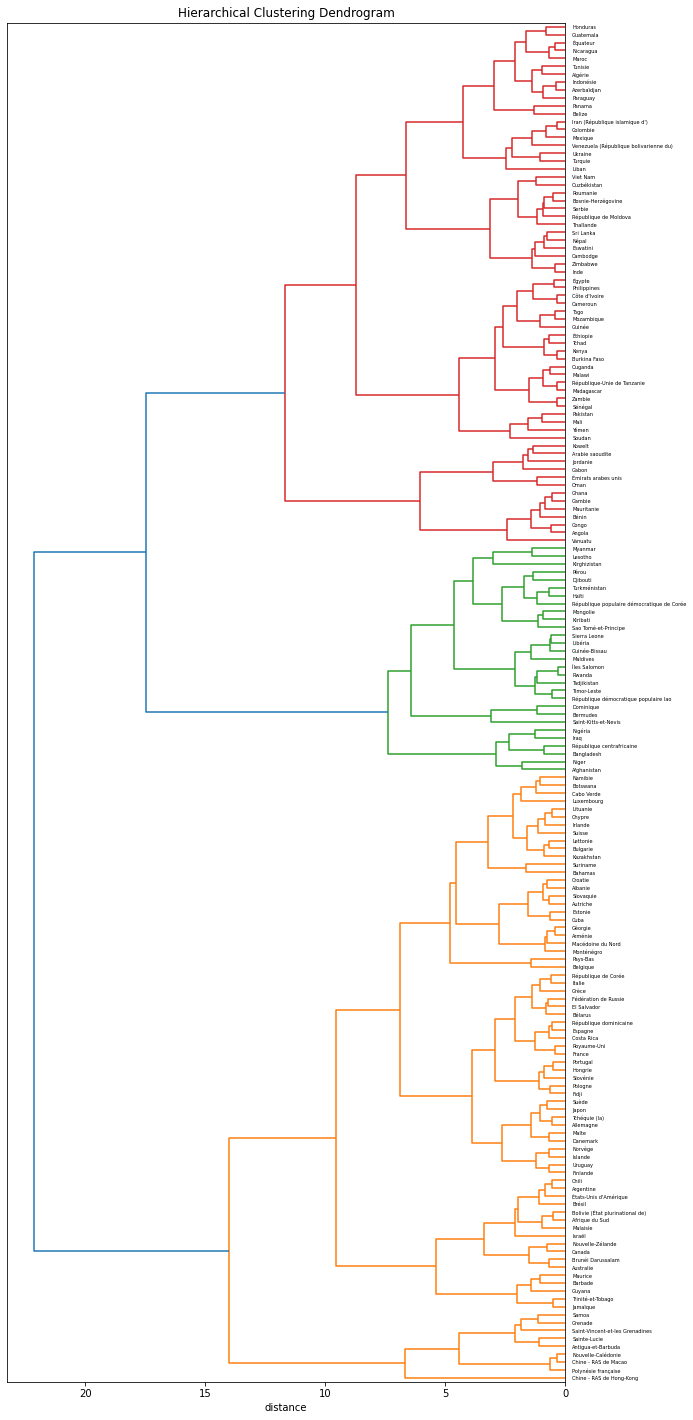

In [35]:
plot_dendrogram(Z, names)

##### Coupage du dendrogramme en 4 clusters

In [36]:
clusters = fcluster(Z, 4, criterion='maxclust')
clusters

array([3, 2, 2, 4, 2, 4, 1, 4, 2, 2, 2, 2, 4, 2, 3, 2, 2, 4, 3, 2, 4, 2,
       2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 4, 2, 3,
       3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 1, 2, 4, 4, 3, 2, 2, 3, 4, 2,
       4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 4, 3, 2, 4, 3, 2, 2,
       2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 4, 3, 2, 4, 3, 2, 4, 3, 3, 2, 1, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 1, 2, 3, 4, 2, 3, 3, 2, 4, 2, 3, 3,
       4, 3, 1, 1, 1, 3, 4, 3, 2, 2, 4, 4, 2, 2, 2, 4, 3, 4, 2, 4, 3, 4,
       2, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3], dtype=int32)

##### Associer les clusters trouvés aux individus

In [37]:
CAH_cluster = pd.DataFrame({"Country": names, "cluster_cah": clusters,})
CAH_cluster

,Country,cluster_cah
0,Afghanistan,3
1,Afrique du Sud,2
2,Albanie,2
3,Algérie,4
4,Allemagne,2
...,...,...
167,Émirats arabes unis,4
168,Équateur,4
169,États-Unis d'Amérique,2
170,Éthiopie,4


##### Afficher les différents clusters avec les noms des pays

In [38]:
CAH_cluster_1 = CAH_cluster[CAH_cluster['cluster_cah'] == 1]
CAH_cluster_1

,Country,cluster_cah
6,Antigua-et-Barbuda,1
33,Chine - RAS de Hong-Kong,1
34,Chine - RAS de Macao,1
56,Grenade,1
108,Nouvelle-Calédonie,1
120,Polynésie française,1
134,Saint-Vincent-et-les Grenadines,1
135,Sainte-Lucie,1
136,Samoa,1


In [39]:
CAH_cluster_2 = CAH_cluster[CAH_cluster['cluster_cah'] == 2]
CAH_cluster_2.head()

,Country,cluster_cah
1,Afrique du Sud,2
2,Albanie,2
4,Allemagne,2
8,Argentine,2
9,Arménie,2


In [40]:
CAH_cluster_3 = CAH_cluster[CAH_cluster['cluster_cah'] == 3]
CAH_cluster_3.head()

,Country,cluster_cah
0,Afghanistan,3
14,Bangladesh,3
18,Bermudes,3
43,Djibouti,3
44,Dominique,3


In [41]:
CAH_cluster_4 = CAH_cluster[CAH_cluster['cluster_cah'] == 4]
CAH_cluster_4.head()

,Country,cluster_cah
3,Algérie,4
5,Angola,4
7,Arabie saoudite,4
12,Azerbaïdjan,4
17,Belize,4


# 4-l'algorithme k-means

##### Créer un modèle de clustering k-means

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

##### Ajuster les données au modèle

In [43]:
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=4)

##### Déterminer à quels clusters appartient chaque point du données :

In [44]:
clusters_km =  kmeans.predict(X_scaled)

##### Ajouter le numéro de cluster aux données d'origine

In [45]:
X_scaled_clustered = pd.DataFrame(X_scaled, columns=features, index=names)
X_scaled_clustered['cluster_Kmeans'] = clusters_km

X_scaled_clustered.head()

,Dispo alimentaire,% d/autosuffissance ali,% dépendance ali,%_croissance_pop,%_d'urbanisation,Political_Stability,cluster_Kmeans
Country,,,,,,,
Afghanistan,-1.061504,-2.221596,-0.761194,1.608822,-1.397070,-3.083853,1
Afrique du Sud,1.234067,0.536850,-0.320141,0.058963,0.347004,-0.238916,3
Albanie,-0.123877,0.534068,0.699690,-0.952751,0.125484,0.506187,3
Algérie,-0.786682,0.534068,-0.735892,0.363080,0.621331,-0.961439,2
Allemagne,-0.156209,0.358436,0.471423,-1.315488,0.827558,0.743265,3


In [46]:
X_scaled_clustered['cluster_Kmeans']

Country
Afghanistan              1
Afrique du Sud           3
Albanie                  3
Algérie                  2
Allemagne                3
                        ..
Émirats arabes unis      0
Équateur                 3
États-Unis d'Amérique    3
Éthiopie                 2
Îles Salomon             1
Name: cluster_Kmeans, Length: 172, dtype: int32

##### méthode du coude pour determiner le nombre de cluster

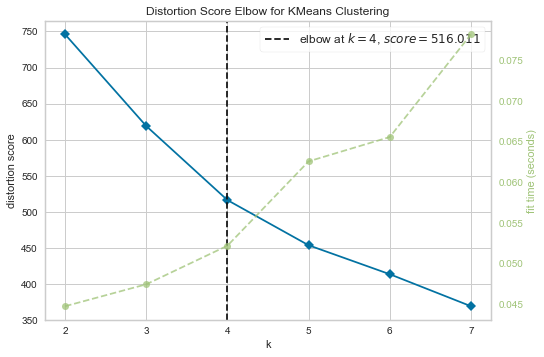

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
Kmeans = KMeans()
visualizer = KElbowVisualizer(Kmeans, k= (2,8))

visualizer.fit(X_scaled)
visualizer.show()

Créer un modèle PCA pour réduire nos données à 3 dimensions pour la visualisation

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_scaled)

#Transférez les données vers le nouvel espace PCA
X_reduced = pca.transform(X_scaled)

In [49]:
# Convertir en data frame
X_reduceddf = pd.DataFrame(X_reduced, index=names, columns=['PC1','PC2','PC3'])
X_reduceddf['cluster_Kmeans'] = clusters
X_reduceddf.head(2)

,PC1,PC2,PC3,cluster_Kmeans
Country,,,,
Afghanistan,4.178063,0.309011,0.518363,3
Afrique du Sud,-0.627240,-0.149772,-0.560501,2


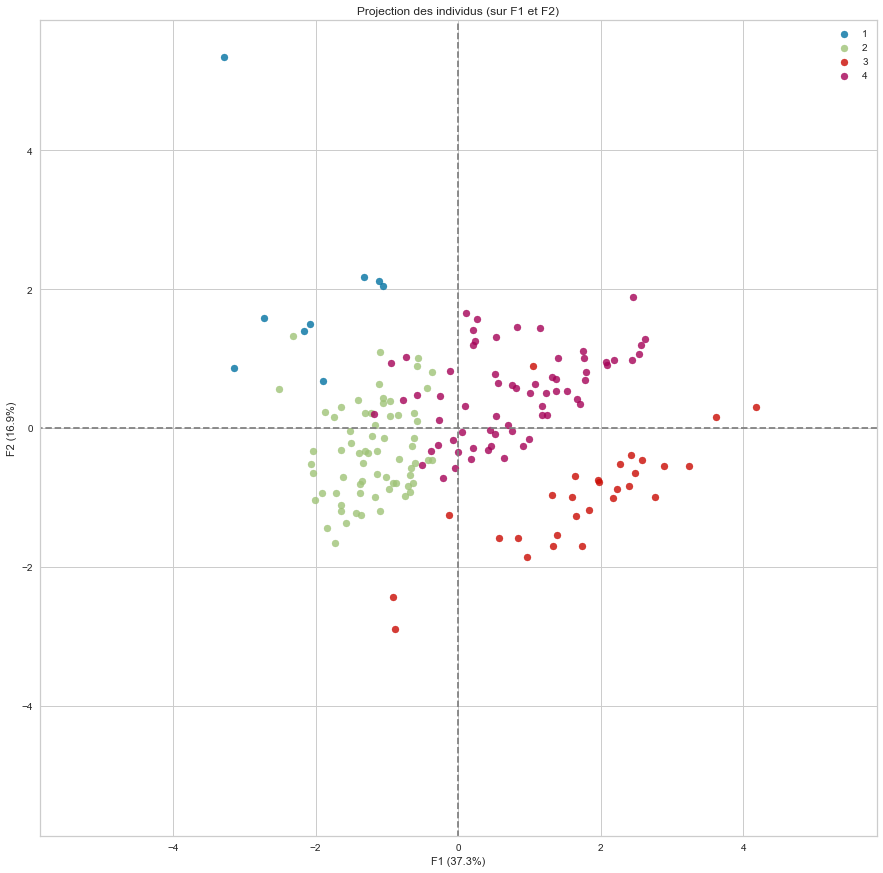

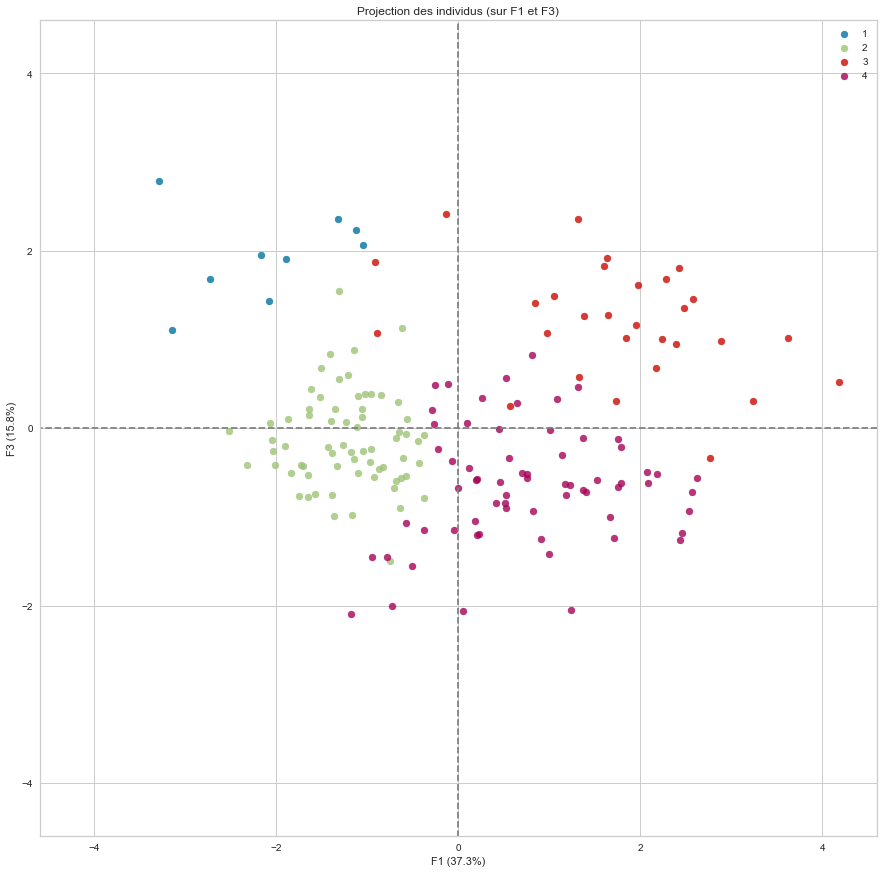

In [58]:
display_factorial_planes(X_reduced, 3, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
display_factorial_planes(X_reduced, 3, pca, [(0,2)], illustrative_var = clusters, alpha = 0.8)


##### Afficher les centroïdes des clusters

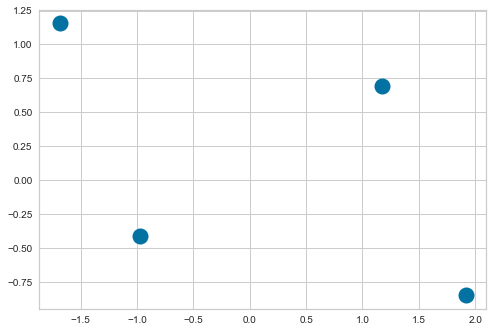

In [51]:
centres_reduced = pca.transform(kmeans.cluster_centers_)
centres_reduced
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],

            marker='o', s=169, linewidths=3,
            color='b', zorder=10)

### Comparaison des clusters entre le CAH et le Kmean

In [52]:
Kmeans_cluster= X_scaled_clustered.drop(['Dispo alimentaire','% d/autosuffissance ali','% dépendance ali', '%_croissance_pop', "%_d'urbanisation", 'Political_Stability'], axis =1)
Kmeans_cluster

,cluster_Kmeans
Country,
Afghanistan,1
Afrique du Sud,3
Albanie,3
Algérie,2
Allemagne,3
...,...
Émirats arabes unis,0
Équateur,3
États-Unis d'Amérique,3


In [53]:
Kmeans_cluster.merge(CAH_cluster, on = 'Country')

,Country,cluster_Kmeans,cluster_cah
0,Afghanistan,1,3
1,Afrique du Sud,3,2
2,Albanie,3,2
3,Algérie,2,4
4,Allemagne,3,2
...,...,...,...
167,Émirats arabes unis,0,4
168,Équateur,3,4
169,États-Unis d'Amérique,3,2
170,Éthiopie,2,4


##### Comparer le nombre d'individu dns chaque cluster selon la méthode de clustering

In [54]:
Kmeans_cluster['cluster_Kmeans'].value_counts()

3    77
2    47
1    28
0    20
Name: cluster_Kmeans, dtype: int64

In [55]:
CAH_cluster['cluster_cah'].value_counts()

2    68
4    66
3    29
1     9
Name: cluster_cah, dtype: int64

### 5-HEATMAP

In [56]:
data_heatmap = X_scaled_clustered.set_index("cluster_Kmeans")
data_heatmap = data_heatmap.groupby(
  level='cluster_Kmeans').mean()
data_heatmap

,Dispo alimentaire,% d/autosuffissance ali,% dépendance ali,%_croissance_pop,%_d'urbanisation,Political_Stability
cluster_Kmeans,,,,,,
0,1.322979,0.248774,1.826225,-0.043728,-0.129408,0.643353
1,-0.694305,-2.115329,-0.680560,0.535929,-0.566366,-0.474381
2,-0.759166,0.524965,-0.261725,0.727439,-0.523825,-0.823324
3,0.372230,0.384161,-0.067114,-0.627547,0.559302,0.507946


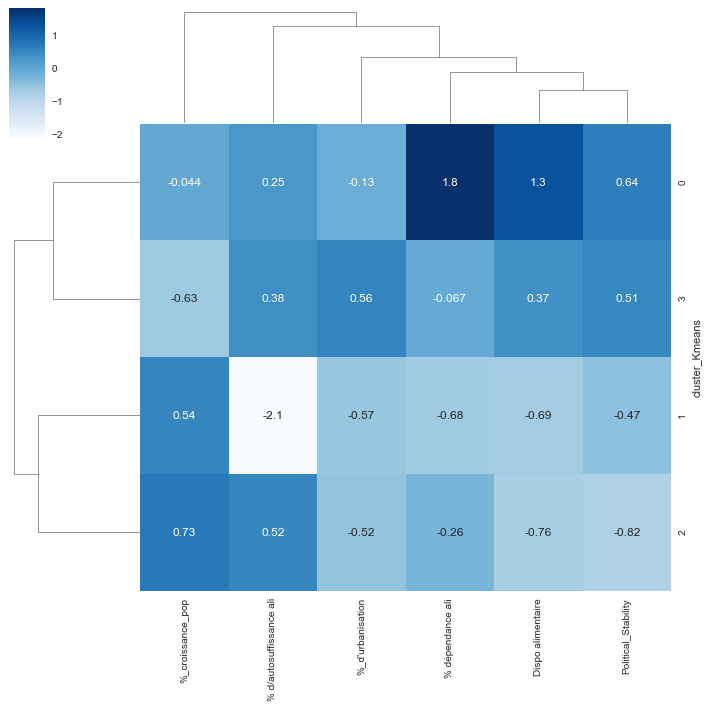

In [57]:
sns.clustermap(data_heatmap, figsize=(10, 10), annot= True, cmap='Blues');
plt.savefig('clustermap_image_whatIs.png', dpi=200)